<a href="https://colab.research.google.com/github/moumita31/moumita.github.io/blob/master/BDD100k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Navigate to the directory where the file was uploaded
!unzip -q /content/bdd10k.zip -d /content/dataset

In [2]:
# List the contents of the dataset directory
!ls /content/dataset/bdd10k

bdd10k.yaml  test  train  valid


In [4]:
#Verifying the classes
import os
import collections

# Count instances of each class in the label files
label_dir = '/content/dataset/bdd10k/train/labels'
selected_classes= ["person", "rider", "car", "truck", "bus", "train", "motor", "bike", "traffic light", "traffic sign"]
class_counts = collections.Counter()

for file in os.listdir(label_dir):
    with open(os.path.join(label_dir, file), 'r') as f:
        lines = f.readlines()
    for line in lines:
        class_id = int(line.split()[0])
        class_counts[class_id] += 1

# Print results
for class_id, count in class_counts.items():
    print(f"{selected_classes[class_id]}: {count} instances")


traffic sign: 24257 instances
car: 72089 instances
truck: 3021 instances
traffic light: 19053 instances
person: 8934 instances
rider: 457 instances
bike: 729 instances
bus: 1157 instances
motor: 291 instances
train: 14 instances


In [5]:
import os

# Define the class names
class_names = ["person", "rider", "car", "truck", "bus", "train", "motor", "bike", "traffic light", "traffic sign"]

# Define the dataset paths (update these paths if needed)
train_images_path = "/content/dataset/bdd10k/train/images"
valid_images_path = "/content/dataset/bdd10k/valid/images"

# Verify that the folders exist
if not os.path.exists(train_images_path):
    raise FileNotFoundError(f"Train images path does not exist: {train_images_path}")
if not os.path.exists(valid_images_path):
    raise FileNotFoundError(f"Valid images path does not exist: {valid_images_path}")

# YAML file content
yaml_content = f"""# Dataset YAML file for YOLOv8

# Paths to dataset folders
train: {train_images_path}
val: {valid_images_path}

# Number of classes
nc: {len(class_names)}

# Class names
names:
"""

# Add class names to YAML content
for idx, name in enumerate(class_names):
    yaml_content += f"  {idx}: {name}\n"

# Save the YAML file
yaml_file_path = "Dataset.yaml"
with open(yaml_file_path, "w") as yaml_file:
    yaml_file.write(yaml_content)

print(f"YAML file created successfully: {yaml_file_path}")


YAML file created successfully: Dataset.yaml


In [6]:
# List the contents of the dataset directory
!ls /content/dataset/bdd10k

bdd10k.yaml  test  train  valid


In [7]:
#Verify YAML file
import yaml
import os

# Path to the YAML file
yaml_file_path = "/content/Dataset.yaml"

# Function to verify the YAML file
def verify_yaml(yaml_file_path):
    try:
        # Load YAML file
        with open(yaml_file_path, 'r') as file:
            yaml_data = yaml.safe_load(file)

        print("YAML File Loaded Successfully!")

        # Verify dataset paths
        dataset_keys = ["train", "val", "test"]
        for key in dataset_keys:
            if key in yaml_data:
                path = yaml_data[key]
                if os.path.exists(path):
                    print(f"{key.capitalize()} path exists: {path}")
                else:
                    print(f"Error: {key.capitalize()} path does not exist: {path}")
            else:
                print(f"Warning: '{key}' key is missing in YAML file.")

        # Verify the number of classes
        if "nc" in yaml_data:
            print(f"Number of classes (nc): {yaml_data['nc']}")
        else:
            print("Error: 'nc' (number of classes) is missing in the YAML file.")

        # Verify class names
        if "names" in yaml_data:
            print(f"Classes: {yaml_data['names']}")
            if len(yaml_data["names"]) != yaml_data.get("nc", 0):
                print("Error: Number of class names does not match 'nc' value.")
        else:
            print("Error: 'names' (class names) is missing in the YAML file.")

    except Exception as e:
        print(f"Error loading YAML file: {e}")

# Run verification
verify_yaml(yaml_file_path)


YAML File Loaded Successfully!
Train path exists: /content/dataset/bdd10k/train/images
Val path exists: /content/dataset/bdd10k/valid/images
Number of classes (nc): 10
Classes: {0: 'person', 1: 'rider', 2: 'car', 3: 'truck', 4: 'bus', 5: 'train', 6: 'motor', 7: 'bike', 8: 'traffic light', 9: 'traffic sign'}


In [8]:
#setup YOLOv8
# Install YOLOv8 and other dependencies
!pip install ultralytics opencv-python-headless

# Check installation
from ultralytics import YOLO
print('YOLOv8 installed and ready to use!')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 38.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8 installed and ready to use!


In [9]:
#Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

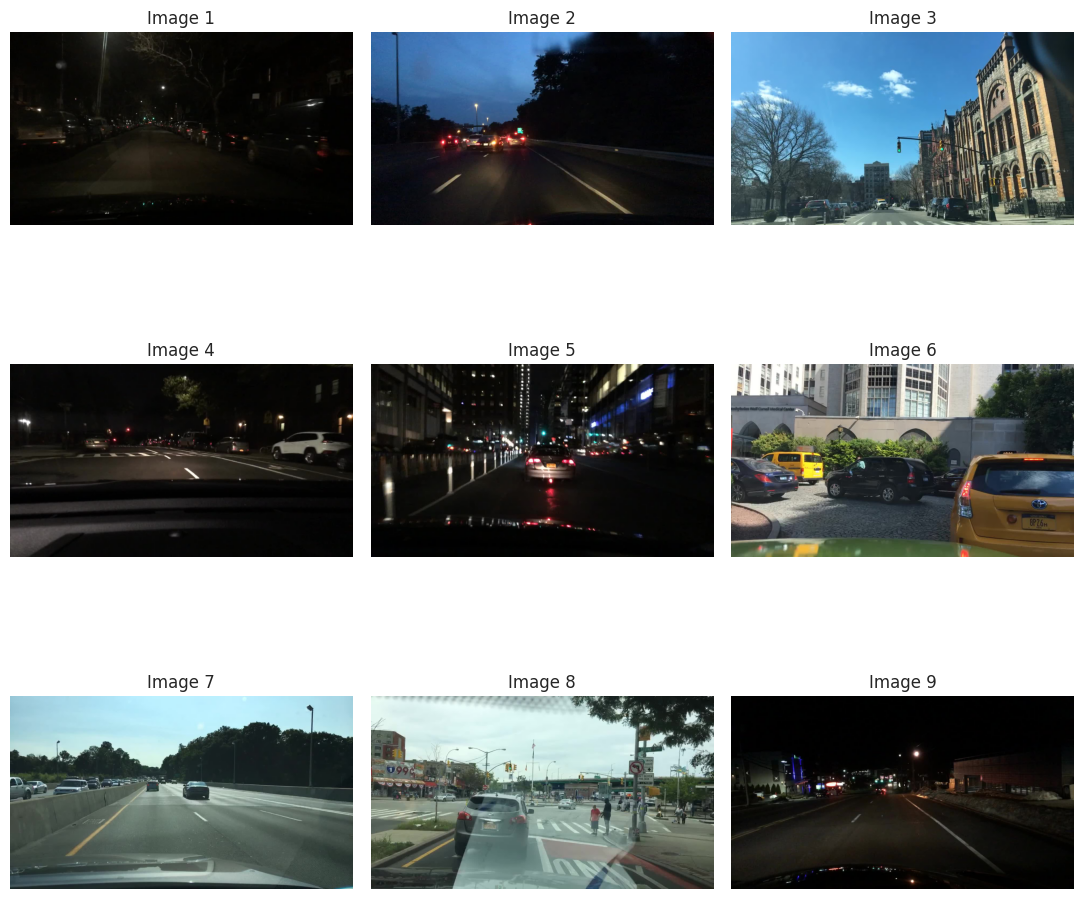

In [11]:
#showing sample images from dataset
Image_dir = '/content/dataset/bdd10k/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# Get the size of the image
image = cv2.imread("/content/dataset/bdd10k/train/images/0000f77c-62c2a288.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 1280x720 and 3 channels.


100%|██████████| 6.25M/6.25M [00:00<00:00, 131MB/s]



image 1/1 /content/dataset/bdd10k/train/images/000f8d37-d4c09a0f.jpg: 384x640 6 persons, 12 cars, 1 traffic light, 127.6ms
Speed: 17.7ms preprocess, 127.6ms inference, 975.1ms postprocess per image at shape (1, 3, 384, 640)


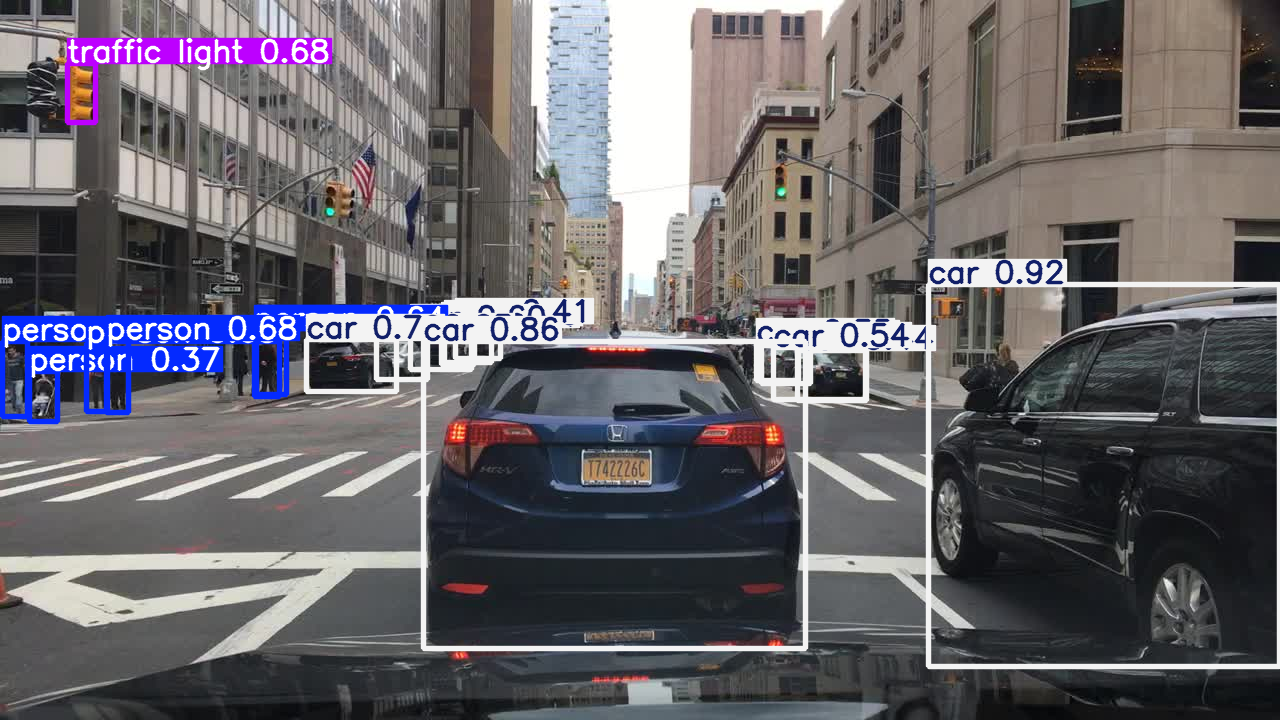

In [13]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/dataset/bdd10k/train/images/000f8d37-d4c09a0f.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [14]:
!pip install --upgrade ultralytics ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 10.9 MB/s eta 0:00:00


In [15]:
# Start training
# Load a YOLO model
model = YOLO('yolov8n.yaml')

# Train the model
results = model.train(
    data='/content/Dataset.yaml',  # Dataset YAML file
    epochs=10,                          # Number of epochs
    imgsz=1280,                         # Image size, close to original dimensions
    batch=8,                           # Adjust based on GPU memory
    optimizer='auto',                   # Use automatic optimizer
    name='traffic_detection',           # Experiment name
)


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Dataset.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=traffic_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 42.6MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 172MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/bdd10k/train/labels... 7000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7000/7000 [00:04<00:00, 1647.44it/s]


train: New cache created: /content/dataset/bdd10k/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/bdd10k/valid/labels... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:01<00:00, 884.89it/s]

val: New cache created: /content/dataset/bdd10k/valid/labels.cache


Plotting labels to runs/detect/traffic_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 2 dataloader workers
Logging results to runs/detect/traffic_detection
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       5.7G      3.425      4.706      3.363        142       1280: 100%|██████████| 875/875 [07:59<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:26<00:00,  2.37it/s]


                   all       1000      18290      0.234     0.0195     0.0129     0.0043

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.38G       2.63      2.758      2.133        117       1280: 100%|██████████| 875/875 [07:54<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:19<00:00,  3.30it/s]


                   all       1000      18290      0.283     0.0673     0.0565     0.0232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.35G      2.255      2.148      1.777        120       1280: 100%|██████████| 875/875 [07:57<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:19<00:00,  3.23it/s]


                   all       1000      18290      0.253      0.111     0.0898     0.0405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.85G      2.085      1.885      1.626         96       1280: 100%|██████████| 875/875 [08:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:19<00:00,  3.23it/s]


                   all       1000      18290      0.373      0.144      0.117     0.0546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      6.06G      1.979      1.736      1.542        144       1280: 100%|██████████| 875/875 [08:00<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:19<00:00,  3.28it/s]


                   all       1000      18290      0.517      0.155      0.145     0.0668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.01G       1.91      1.625      1.489        153       1280: 100%|██████████| 875/875 [08:00<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:21<00:00,  2.98it/s]


                   all       1000      18290      0.514      0.162      0.151     0.0704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.52G      1.865      1.558      1.453        151       1280: 100%|██████████| 875/875 [08:00<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:19<00:00,  3.23it/s]


                   all       1000      18290      0.514      0.177      0.171     0.0821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         6G      1.824      1.496      1.425        197       1280: 100%|██████████| 875/875 [08:00<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:20<00:00,  3.13it/s]


                   all       1000      18290       0.47      0.197      0.182     0.0876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.63G      1.791      1.447      1.402        110       1280: 100%|██████████| 875/875 [07:57<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:18<00:00,  3.36it/s]


                   all       1000      18290      0.509      0.199      0.194     0.0918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.27G      1.769      1.413      1.386        106       1280: 100%|██████████| 875/875 [08:04<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:20<00:00,  3.04it/s]


                   all       1000      18290      0.471      0.202      0.197     0.0954

10 epochs completed in 1.395 hours.
Optimizer stripped from runs/detect/traffic_detection/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/traffic_detection/weights/best.pt, 6.3MB

Validating runs/detect/traffic_detection/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:22<00:00,  2.75it/s]


                   all       1000      18290      0.472      0.202      0.198     0.0955
                person        325       1234      0.399      0.256      0.246     0.0958
                 rider         48         60      0.295     0.0167     0.0731     0.0299
                   car        987       9987      0.493      0.632      0.618      0.351
                 truck        268        416      0.391      0.248      0.219      0.131
                   bus        133        170      0.249      0.166       0.12     0.0739
                 train          1          2          0          0          0          0
                 motor         28         39          1          0     0.0211     0.0101
                  bike         65        111          1          0     0.0266    0.00777
         traffic light        566       2740      0.416      0.374      0.323      0.101
          traffic sign        811       3531      0.473      0.327      0.329      0.155
Speed: 0.5ms preproce

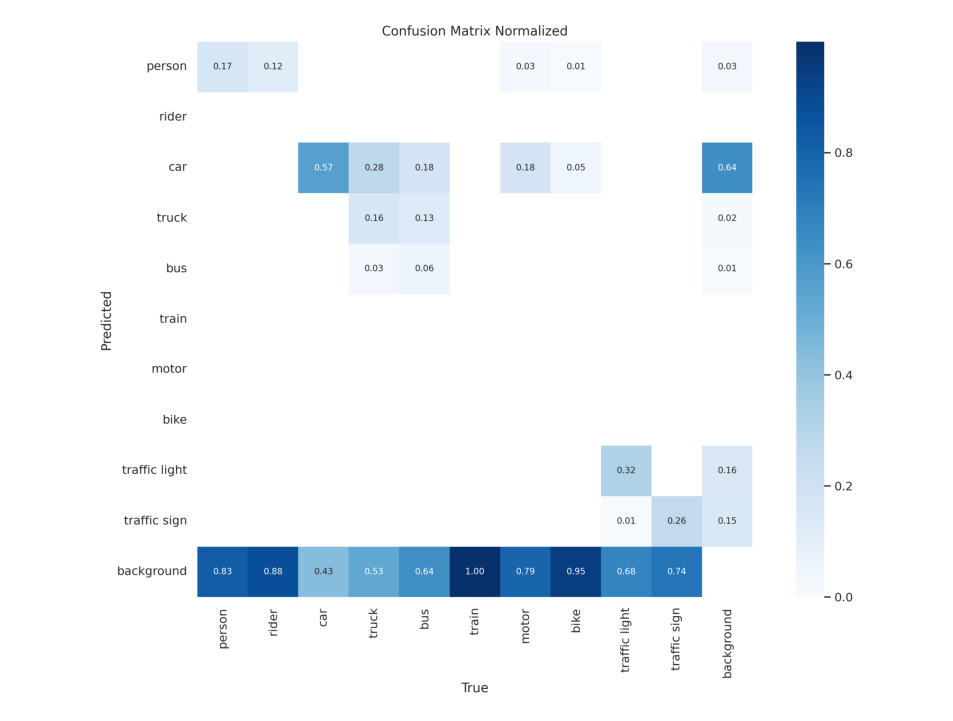

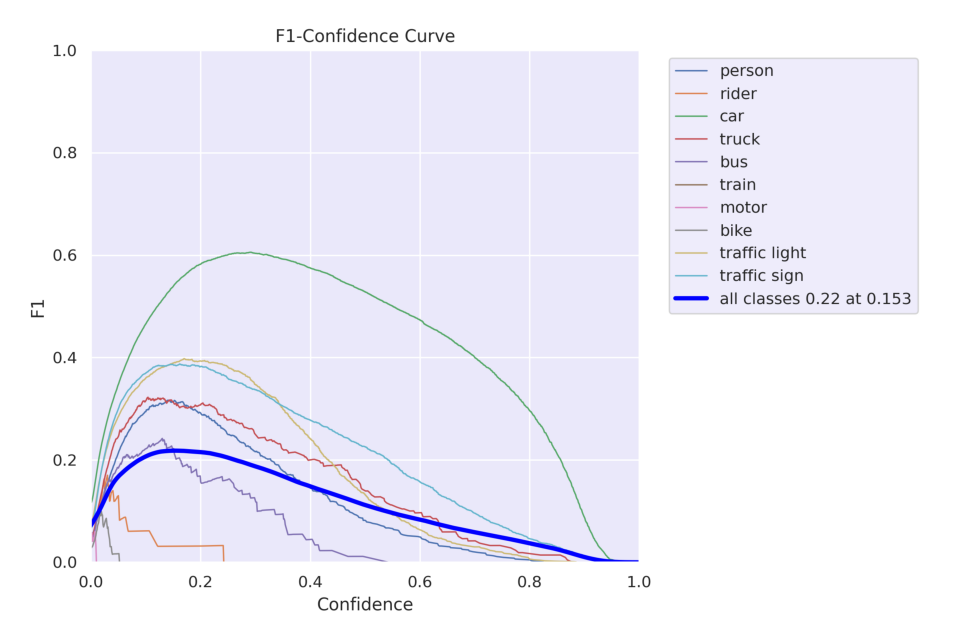

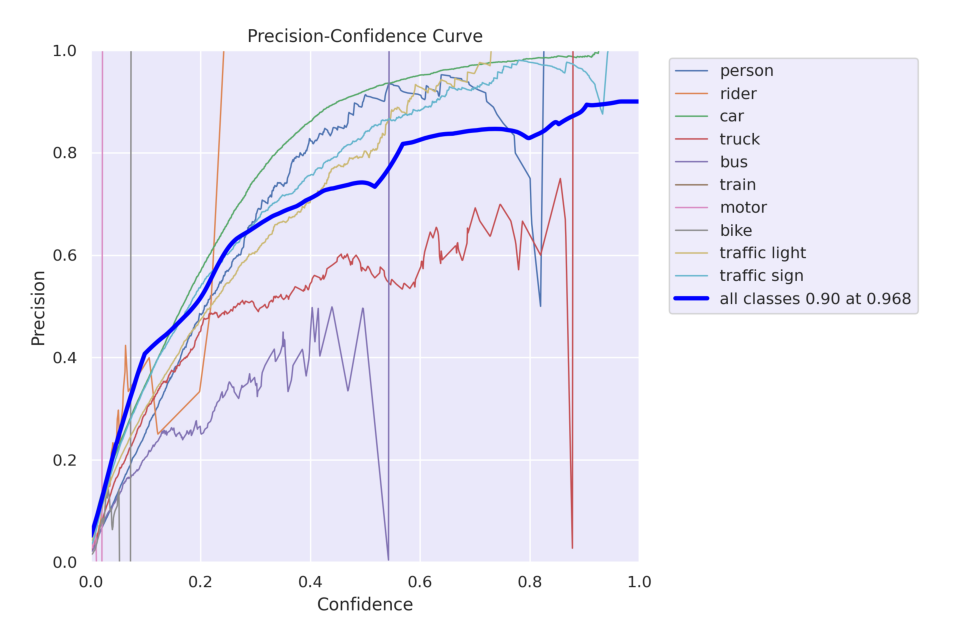

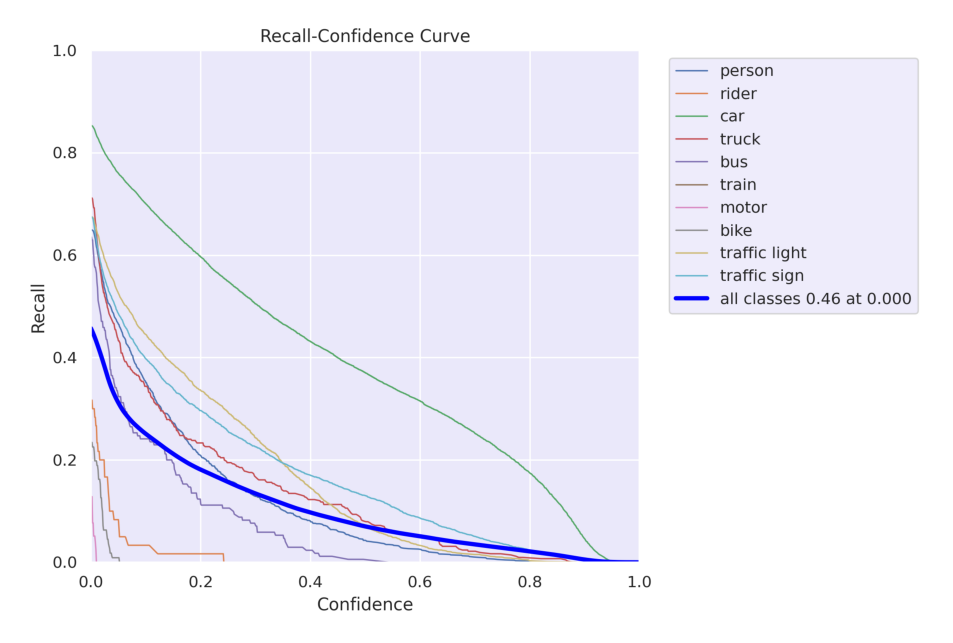

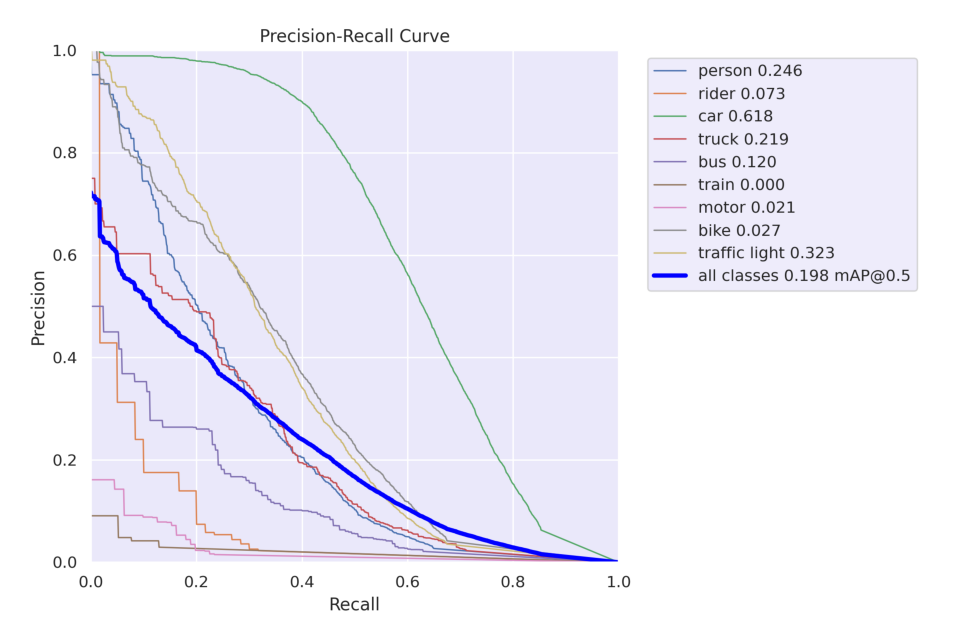

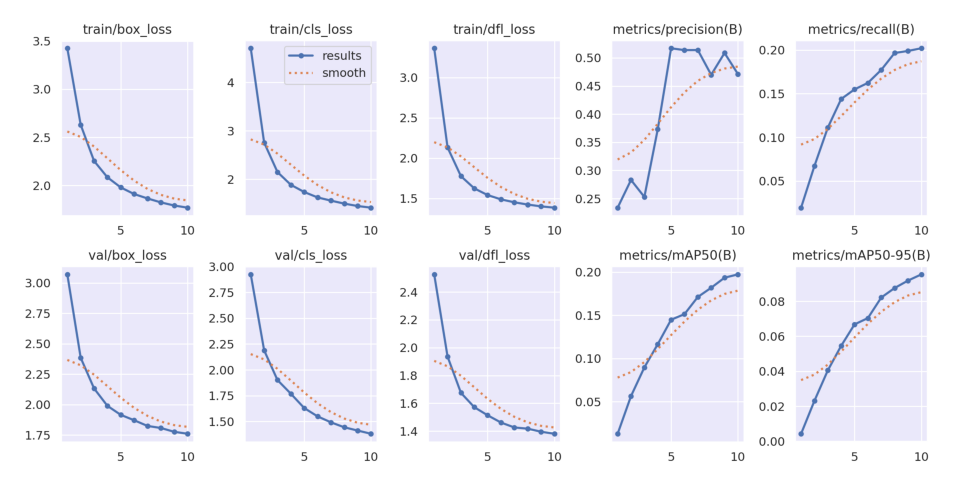

In [16]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)

        # Check if the file exists before reading
        if not os.path.isfile(image_path):
            print(f"File not found: {image_path}")
            continue

        img = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if img is None:
            print(f"Failed to load image: {image_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/traffic_detection'

# Display the images
display_images(post_training_files_path, image_files)


In [17]:
Result_Final_model = pd.read_csv('/content/runs/detect/traffic_detection/results.csv')
Result_Final_model.tail(10)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,509.869,3.42525,4.70566,3.36263,0.23382,0.01947,0.01289,0.00430,3.07019,2.92447,2.52656,0.000238,0.000238,0.000238
1,2,1005.040,2.63038,2.75819,2.13306,0.28303,0.06725,0.05651,0.02316,2.38476,2.18950,1.93571,0.000429,0.000429,0.000429
2,3,1503.580,2.25459,2.14824,1.77700,0.25287,0.11111,0.08976,0.04053,2.13292,1.90080,1.67520,0.000572,0.000572,0.000572
3,4,2009.790,2.08464,1.88480,1.62552,0.37293,0.14387,0.11655,0.05457,1.98952,1.76877,1.57206,0.000502,0.000502,0.000502
4,5,2510.980,1.97915,1.73635,1.54238,0.51699,0.15489,0.14494,0.06681,1.91540,1.62999,1.51370,0.000431,0.000431,0.000431
5,6,3013.380,1.91049,1.62479,1.48936,0.51375,0.16232,0.15137,0.07040,1.87129,1.54921,1.46160,0.000361,0.000361,0.000361
6,7,3514.750,1.86486,1.55829,1.45285,0.51388,0.17721,0.17127,0.08215,1.82426,1.49159,1.42635,0.000290,0.000290,0.000290
7,8,4017.110,1.82390,1.49645,1.42501,0.46986,0.19652,0.18194,0.08758,1.80754,1.44336,1.41750,0.000219,0.000219,0.000219
8,9,4514.550,1.79137,1.44681,1.40237,0.50864,0.19890,0.19360,0.09182,1.77615,1.41197,1.39573,0.000149,0.000149,0.000149
9,10,5021.340,1.76902,1.41295,1.38645,0.47134,0.20193,0.19742,0.09537,1.75994,1.38070,1.38097,0.000078,0.000078,0.000078


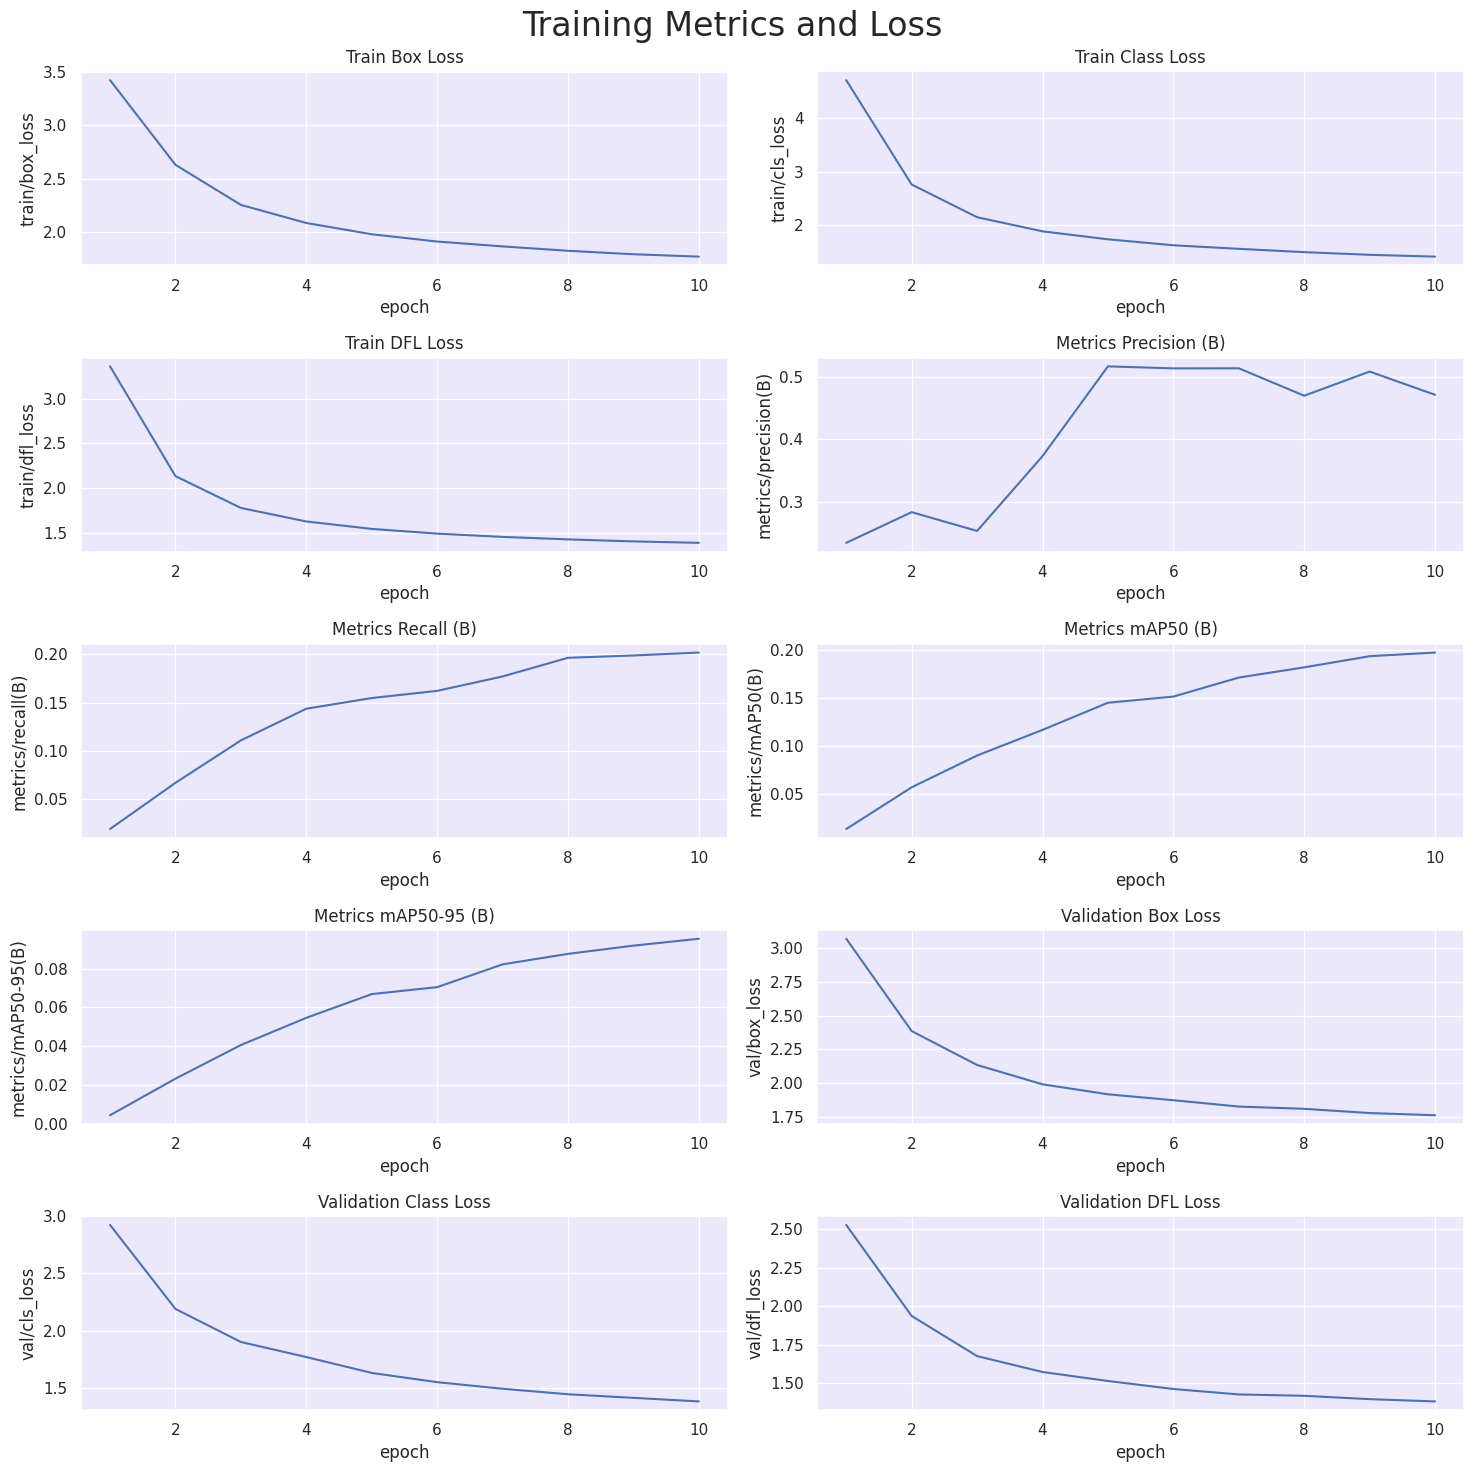

In [18]:
 #Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [19]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/traffic_detection/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/bdd10k/valid/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:25<00:00,  2.51it/s]


                   all       1000      18290      0.473      0.202      0.198     0.0958
                person        325       1234      0.404      0.257      0.248     0.0967
                 rider         48         60      0.295     0.0167     0.0728     0.0299
                   car        987       9987      0.495      0.633      0.619      0.351
                 truck        268        416       0.39      0.248      0.218       0.13
                   bus        133        170      0.248      0.165       0.12     0.0733
                 train          1          2          0          0          0          0
                 motor         28         39          1          0     0.0211     0.0108
                  bike         65        111          1          0      0.027    0.00801
         traffic light        566       2740      0.426      0.377      0.326      0.102
          traffic sign        811       3531      0.477      0.327      0.329      0.156
Speed: 0.7ms preproce

In [20]:
import cv2
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/traffic_detection/weights/best.pt')

# Path to the input video
input_video_path = '/content/Output.mov'
output_video_path = '/content/detected_video.mp4'

# Open the video file
cap = cv2.VideoCapture(input_video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for output video
out = cv2.VideoWriter(output_video_path, fourcc, cap.get(cv2.CAP_PROP_FPS),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run the YOLO model on each frame
    results = model(frame, stream=True)

    # Annotate frame with detection results
    for result in results:
        for box in result.boxes:
            # Draw bounding boxes and labels
            bbox = box.xyxy[0].cpu().numpy()  # [x1, y1, x2, y2]
            cls = int(box.cls[0])            # Class ID
            conf = box.conf[0].cpu().numpy() # Confidence score
            label = f"{model.names[cls]} {conf:.2f}"

            # Draw rectangle and label on frame
            cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (255, 0, 0), 2)
            cv2.putText(frame, label, (int(bbox[0]), int(bbox[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Write the annotated frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

print(f"Detection video saved to {output_video_path}")



0: 736x1280 11 persons, 5 cars, 4 traffic lights, 2 traffic signs, 76.0ms
Speed: 5.1ms preprocess, 76.0ms inference, 2.1ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 7 persons, 6 cars, 3 traffic lights, 2 traffic signs, 14.0ms
Speed: 5.8ms preprocess, 14.0ms inference, 3.2ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 9 persons, 6 cars, 3 traffic lights, 3 traffic signs, 12.4ms
Speed: 5.2ms preprocess, 12.4ms inference, 2.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 10 persons, 5 cars, 4 traffic lights, 3 traffic signs, 12.5ms
Speed: 4.4ms preprocess, 12.5ms inference, 3.8ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 11 persons, 6 cars, 4 traffic lights, 1 traffic sign, 12.4ms
Speed: 5.5ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 13 persons, 5 cars, 2 traffic lights, 1 traffic sign, 12.3ms
Speed: 4.0ms preprocess, 12.3ms inference, 1.8ms postprocess per

In [21]:
import cv2
from ultralytics import YOLO
import numpy as np

# Load the trained model
model = YOLO('/content/runs/detect/traffic_detection/weights/best.pt')

# Path to the input video
input_video_path = '/content/Output.mov'  # Updated with your file path
output_video_path = '/content/detected_video_with_distance.mp4'

# Define bounding box widths and colors for each class
class_properties = {
    "person": {"width": 2, "color": (255, 0, 0)},          # Red
    "rider": {"width": 2, "color": (0, 255, 0)},           # Green
    "car": {"width": 2, "color": (0, 0, 255)},             # Blue
    "truck": {"width": 3, "color": (255, 255, 0)},         # Yellow
    "bus": {"width": 3, "color": (255, 0, 255)},           # Magenta
    "train": {"width": 3, "color": (0, 255, 255)},         # Cyan
    "motor": {"width": 2, "color": (128, 128, 128)},       # Gray
    "bike": {"width": 2, "color": (255, 165, 0)},          # Orange
    "traffic light": {"width": 2, "color": (0, 128, 0)},   # Dark Green
    "traffic sign": {"width": 2, "color": (75, 0, 130)}    # Indigo
}

# Define the approximate width for each class (in meters)
class_widths = {
    "person": 0.5,
    "rider": 0.6,
    "car": 2.0,
    "truck": 2.5,
    "bus": 2.5,
    "train": 3.0,
    "motor": 0.8,
    "bike": 0.6,
    "traffic light": 0.3,
    "traffic sign": 0.6
}

# Function to calculate distance (simplified)
def calculate_distance(width, focal_length, pixel_width):
    # Simple formula: distance = (width * focal_length) / pixel_width
    distance = (width * focal_length) / pixel_width
    return distance

# Assuming you know the focal length of your camera
focal_length = 1000  # Example value (this should be calibrated for your specific camera)

# Open the video file
cap = cv2.VideoCapture(input_video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for output video
out = cv2.VideoWriter(output_video_path, fourcc, cap.get(cv2.CAP_PROP_FPS),
                      (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run the YOLO model on each frame
    results = model(frame, stream=True)

    # Annotate frame with detection results
    for result in results:
        for box in result.boxes:
            bbox = box.xyxy[0].cpu().numpy()  # [x1, y1, x2, y2]
            cls = int(box.cls[0])            # Class ID
            conf = box.conf[0].cpu().numpy() # Confidence score
            class_name = model.names[cls]
            label = f"{class_name} {conf:.2f}"

            # Calculate the width of the bounding box in pixels
            pixel_width = bbox[2] - bbox[0]

            # Get the real-world width of the object based on the class
            object_width = class_widths.get(class_name, 1.0)  # Default to 1.0 meters if not found

            # Calculate the distance
            distance = calculate_distance(object_width, focal_length, pixel_width)

            # Add the distance to the label
            label_with_distance = f"{label} | {distance:.2f}m"

            # Get the color and bounding box width for the current class
            properties = class_properties.get(class_name, {"width": 2, "color": (255, 255, 255)})  # Default to white, width 2
            color = properties["color"]
            bbox_width = properties["width"]

            # Draw rectangle and label on frame with the class-specific color and width
            cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), color, bbox_width)
            cv2.putText(frame, label_with_distance, (int(bbox[0]), int(bbox[1]) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write the annotated frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

print(f"Detection video with distance and distinct colors saved to {output_video_path}")



0: 736x1280 11 persons, 5 cars, 4 traffic lights, 2 traffic signs, 14.0ms
Speed: 4.2ms preprocess, 14.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 7 persons, 6 cars, 3 traffic lights, 2 traffic signs, 12.3ms
Speed: 4.3ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 9 persons, 6 cars, 3 traffic lights, 3 traffic signs, 12.3ms
Speed: 4.3ms preprocess, 12.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 10 persons, 5 cars, 4 traffic lights, 3 traffic signs, 12.3ms
Speed: 4.2ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 11 persons, 6 cars, 4 traffic lights, 1 traffic sign, 12.3ms
Speed: 4.2ms preprocess, 12.3ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)

0: 736x1280 13 persons, 5 cars, 2 traffic lights, 1 traffic sign, 12.3ms
Speed: 4.3ms preprocess, 12.3ms inference, 1.4ms postprocess per